# Transformers stock prediction

In [22]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout, LayerNormalization
import plotly.graph_objects as go

# Load the stock data
df = pd.read_csv(r'C:\Users\emili\Downloads\Machine_Learning_SP_Course\Machine_Learning_Project\TSLA.csv')#, index_col = 'Date')
df = df.drop(labels=range(0, len(df.index)-127), axis=0);

# Preprocess the data
scaler = MinMaxScaler(feature_range=(0, 1))
df['Close'] = scaler.fit_transform(df['Close'].values.reshape(-1, 1))

# Split the data into training and testing sets
train_size = int(len(df) * 0.8)
train_data = df[:train_size]
test_data = df[train_size:]

# Define the sequence length and number of features
sequence_length = 10
num_features = 1

# Generate sequences for training data
def generate_sequences(data):
    X = []
    y = []
    for i in range(len(data) - sequence_length):
        X.append(data[i:i+sequence_length])
        y.append(data[i+sequence_length])
    return np.array(X), np.array(y)

X_train, y_train = generate_sequences(train_data['Close'].values)
X_test, y_test = generate_sequences(test_data['Close'].values)

# Define the Transformer model architecture
def transformer_model():
    inputs = Input(shape=(sequence_length, num_features))
    x = inputs

    # Encoder layers
    for _ in range(2):
        x = tf.keras.layers.MultiHeadAttention(
            key_dim=32, num_heads=2, dropout=0.2
        )(x, x)
        x = LayerNormalization(epsilon=1e-6)(x)
        x = Dropout(0.2)(x)

    x = Dense(64, activation='relu')(x)
    x = Dense(32, activation='relu')(x)
    x = Dense(1)(x)

    model = Model(inputs=inputs, outputs=x)
    return model

# Create an instance of the model
model = transformer_model()

# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam')

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print('Test Loss:', loss)

# Make predictions
predictions = model.predict(X_test)

# Reshape predictions
predictions = predictions.reshape(-1, 1)

# Inverse scale the predictions
predictions = scaler.inverse_transform(predictions)

# Plot the predicted and actual values
trace1 = go.Scatter(
    x = test_data['Date'].values[sequence_length:],
    y = predictions.flatten(),
    mode = 'lines',
    name = 'Predicted'
)

trace2 = go.Scatter(
    x = test_data['Date'].values[sequence_length:],
    y = test_data['Close'].values[sequence_length:],
    mode='lines',
    name = 'Actual'
)

layout = go.Layout(
    title = 'Predicted vs Actual Stock Prices',
    xaxis = {'title' : "Date"},
    yaxis = {'title' : "Close"}
)

fig = go.Figure(data=[trace1, trace2], layout=layout)
fig.show()


Epoch 1/10
3/3 [==============================] - 4s 304ms/step - loss: 0.1927 - val_loss: 0.2526
Epoch 2/10
3/3 [==============================] - 0s 28ms/step - loss: 0.1905 - val_loss: 0.2497
Epoch 3/10
3/3 [==============================] - 0s 29ms/step - loss: 0.1883 - val_loss: 0.2470
Epoch 4/10
3/3 [==============================] - 0s 24ms/step - loss: 0.1860 - val_loss: 0.2442
Epoch 5/10
3/3 [==============================] - 0s 33ms/step - loss: 0.1838 - val_loss: 0.2414
Epoch 6/10
3/3 [==============================] - 0s 29ms/step - loss: 0.1817 - val_loss: 0.2387
Epoch 7/10
3/3 [==============================] - 0s 29ms/step - loss: 0.1795 - val_loss: 0.2360
Epoch 8/10
3/3 [==============================] - 0s 40ms/step - loss: 0.1774 - val_loss: 0.2333
Epoch 9/10
3/3 [==============================] - 0s 32ms/step - loss: 0.1754 - val_loss: 0.2306
Epoch 10/10
1/1 [==============================] - 0s 56ms/step - loss: 0.2280
Test Loss: 0.22799554467201233
1/1 [===========

In [25]:
# Load the stock data
df = pd.read_csv(r'C:\Users\emili\Downloads\Machine_Learning_SP_Course\Machine_Learning_Project\TSLA.csv')#, index_col = 'Date')
df = df.drop(labels=range(0, len(df.index)-127), axis=0);

# Preprocess the data
scaler = MinMaxScaler(feature_range=(0, 1))
df['Close'] = scaler.fit_transform(df['Close'].values.reshape(-1, 1))

# Split the data into training and testing sets
train_size = int(len(df) * 0.8)
train_data = df[:train_size]
test_data = df[train_size:]

# Define the sequence length and number of features
sequence_length = 10
num_features = 1

# Generate sequences for training data
def generate_sequences(data):
    X = []
    y = []
    for i in range(len(data) - sequence_length):
        X.append(data[i:i+sequence_length])
        y.append(data[i+sequence_length])
    return np.array(X), np.array(y)

X_train, y_train = generate_sequences(train_data['Close'].values)
X_test, y_test = generate_sequences(test_data['Close'].values)

# Define the Transformer model architecture
def transformer_model():
    inputs = Input(shape=(sequence_length, num_features))
    x = inputs

    # Encoder layers
    for _ in range(5):
        x = tf.keras.layers.MultiHeadAttention(
            key_dim=32, num_heads=5, dropout=0.2
        )(x, x)
        x = LayerNormalization(epsilon=1e-6)(x)
        x = Dropout(0.2)(x)

    x = Dense(64)(x)
    x = tf.keras.layers.LeakyReLU(alpha=0.2)(x)
    x = Dense(32)(x)
    x = tf.keras.layers.LeakyReLU(alpha=0.2)(x)
    x = Dense(1)(x)

    model = Model(inputs=inputs, outputs=x)
    return model

# Create an instance of the model
model = transformer_model()

# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam')

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=4, validation_data=(X_test, y_test))

# Make predictions
predictions = model.predict(X_test)

# Reshape predictions
predictions = predictions.reshape(-1, 1)

# Inverse scale the predictions and actual values
predictions = scaler.inverse_transform(predictions)
actual_values = scaler.inverse_transform(y_test.reshape(-1, 1))

# Plot the predicted and actual values
trace1 = go.Scatter(
    x = test_data['Date'].values[sequence_length:],
    y = predictions.flatten(),
    mode = 'lines',
    name = 'Predicted'
)

trace2 = go.Scatter(
    x = test_data['Date'].values[sequence_length:],
    y = actual_values.flatten(),
    mode='lines',
    name = 'Actual'
)

layout = go.Layout(
    title = 'Predicted vs Actual Stock Prices',
    xaxis = {'title' : "Date"},
    yaxis = {'title' : "Close"}
)

fig = go.Figure(data=[trace1, trace2], layout=layout)
fig.show()


Epoch 1/10
23/23 [==============================] - 9s 53ms/step - loss: 0.1229 - val_loss: 0.0638
Epoch 2/10
23/23 [==============================] - 0s 16ms/step - loss: 0.0536 - val_loss: 0.0333
Epoch 3/10
23/23 [==============================] - 0s 12ms/step - loss: 0.0501 - val_loss: 0.0424
Epoch 4/10
23/23 [==============================] - 0s 12ms/step - loss: 0.0515 - val_loss: 0.0362
Epoch 5/10
23/23 [==============================] - 0s 12ms/step - loss: 0.0524 - val_loss: 0.0432
Epoch 6/10
23/23 [==============================] - 0s 21ms/step - loss: 0.0507 - val_loss: 0.0382
Epoch 7/10
23/23 [==============================] - 1s 24ms/step - loss: 0.0546 - val_loss: 0.0430
Epoch 8/10
23/23 [==============================] - 1s 25ms/step - loss: 0.0531 - val_loss: 0.0419
Epoch 9/10
23/23 [==============================] - 1s 26ms/step - loss: 0.0517 - val_loss: 0.0344
Epoch 10/10
1/1 [==============================] - 1s 1s/step


In [24]:
# Preprocess the data
scaler = MinMaxScaler(feature_range=(0, 1))
df['Close'] = scaler.fit_transform(df['Close'].values.reshape(-1, 1))

# Split the data into training and testing sets
train_size = int(len(df) * 0.8)
train_data = df[:train_size]
test_data = df[train_size:]

# Define the sequence length and number of features
sequence_length = 20
num_features = 1

# Generate sequences for training data
def generate_sequences(data):
    X = []
    y = []
    for i in range(len(data) - sequence_length):
        X.append(data[i:i + sequence_length])
        y.append(data[i + sequence_length])
    return np.array(X), np.array(y)

X_train, y_train = generate_sequences(train_data['Close'].values)
X_test, y_test = generate_sequences(test_data['Close'].values)

# Define the Transformer model architecture
def transformer_model():
    inputs = Input(shape=(sequence_length, num_features))
    x = inputs

    # Encoder layers
    for _ in range(10):
        x = tf.keras.layers.MultiHeadAttention(
            key_dim=64, num_heads=8, dropout=0.2
        )(x, x)
        x = LayerNormalization(epsilon=1e-6)(x)
        x = Dropout(0.2)(x)

    x = Dense(128)(x)
    x = tf.keras.layers.LeakyReLU(alpha=0.2)(x)
    x = Dense(64)(x)
    x = tf.keras.layers.LeakyReLU(alpha=0.2)(x)
    x = Dense(1)(x)

    model = Model(inputs=inputs, outputs=x)
    return model

# Create an instance of the model
model = transformer_model()

# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam')

# Train the model
model.fit(X_train, y_train, epochs=20, batch_size=8, validation_data=(X_test, y_test))

# Make predictions
predictions = model.predict(X_test)

# Reshape predictions
predictions = predictions.reshape(-1, 1)

# Inverse scale the predictions and actual values
predictions = scaler.inverse_transform(predictions)
actual_values = scaler.inverse_transform(y_test.reshape(-1, 1))

# Plot the predicted and actual values
trace1 = go.Scatter(
    x=test_data['Date'].values[sequence_length:],
    y=predictions.flatten(),
    mode='lines',
    name='Predicted'
)

trace2 = go.Scatter(
    x=test_data['Date'].values[sequence_length:],
    y=actual_values.flatten(),
    mode='lines',
    name='Actual'
)

layout = go.Layout(
    title='Predicted vs Actual Stock Prices',
    xaxis={'title': "Date"},
    yaxis={'title': "Close"}
)

fig = go.Figure(data=[trace1, trace2], layout=layout)
fig.show()


Epoch 1/20
11/11 [==============================] - 17s 146ms/step - loss: 0.1209 - val_loss: 0.0239
Epoch 2/20
11/11 [==============================] - 1s 73ms/step - loss: 0.0490 - val_loss: 0.0173
Epoch 3/20
11/11 [==============================] - 1s 70ms/step - loss: 0.0502 - val_loss: 0.0217
Epoch 4/20
11/11 [==============================] - 1s 65ms/step - loss: 0.0411 - val_loss: 0.0071
Epoch 5/20
11/11 [==============================] - 1s 49ms/step - loss: 0.0436 - val_loss: 0.0069
Epoch 6/20
11/11 [==============================] - 1s 57ms/step - loss: 0.0406 - val_loss: 0.0114
Epoch 7/20
11/11 [==============================] - 1s 67ms/step - loss: 0.0406 - val_loss: 0.0104
Epoch 8/20
11/11 [==============================] - 1s 64ms/step - loss: 0.0414 - val_loss: 0.0138
Epoch 9/20
11/11 [==============================] - 1s 68ms/step - loss: 0.0414 - val_loss: 0.0092
Epoch 10/20
11/11 [==============================] - 1s 61ms/step - loss: 0.0407 - val_loss: 0.0082
Epoch 1

# EDA The Historical Data (ChatGPT helped to create these models)

C:\Users\emili\AppData\Local\Temp\ipykernel_2128\525373428.py:14: MatplotlibDeprecationWarning:

Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.



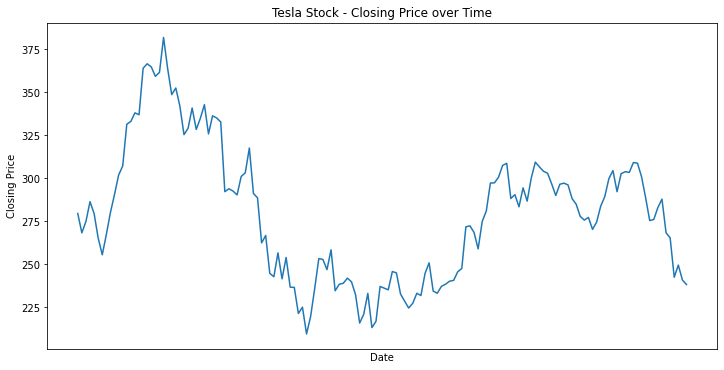

C:\Users\emili\AppData\Local\Temp\ipykernel_2128\525373428.py:37: MatplotlibDeprecationWarning:

Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.



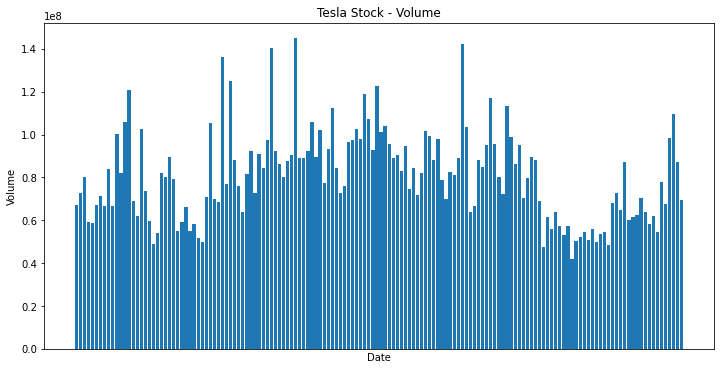

C:\Users\emili\AppData\Local\Temp\ipykernel_2128\525373428.py:57: MatplotlibDeprecationWarning:

Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.



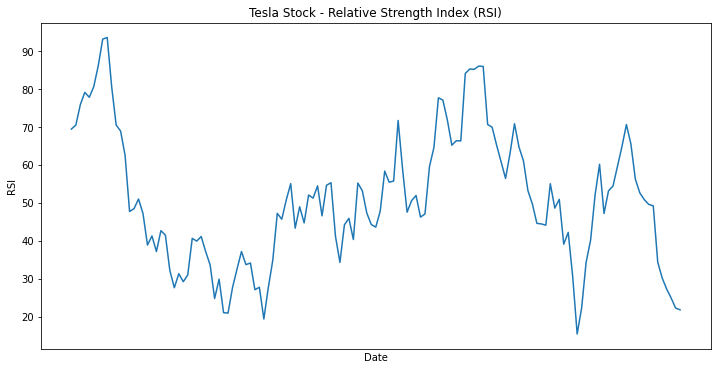

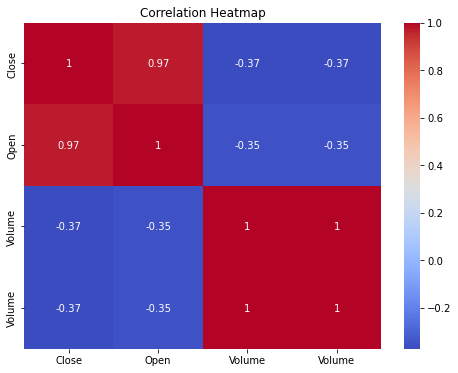

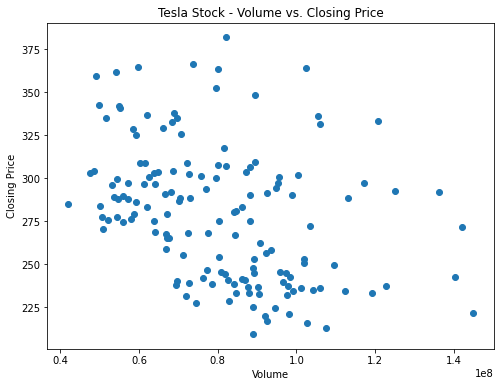

In [14]:
df = pd.read_csv(r'C:\Users\emili\Downloads\Machine_Learning_SP_Course\Machine_Learning_Project\TSLA.csv')
df = df.drop(labels=range(0, len(df.index)-(150)), axis=0);

# Line Plot - Closing Price over Time
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close'])
plt.title('Tesla Stock - Closing Price over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.xticks([])
plt.show()

# Candlestick Chart

fig = go.Figure(data=[go.Candlestick(x=df['Date'],
                                    open=df['Open'],
                                    high=df['High'],
                                    low=df['Low'],
                                    close=df['Close'])])

fig.update_layout(title='Tesla Stock - Candlestick Chart',
                  xaxis_title='Date',
                  yaxis_title='Price')
fig.show()

# Volume Chart
plt.figure(figsize=(12, 6))
plt.bar(df['Date'], df['Volume'])
plt.title('Tesla Stock - Volume')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.xticks([])
plt.show()

# Relative Strength Index (RSI) Plot
def compute_rsi(df, window=14):
    close_diff = df['Close'].diff()
    up = close_diff.where(close_diff > 0, 0)
    down = -close_diff.where(close_diff < 0, 0)
    avg_gain = up.rolling(window).mean()
    avg_loss = down.rolling(window).mean()
    rsi = 100 - (100 / (1 + (avg_gain / avg_loss)))
    return rsi

rsi = compute_rsi(df)

plt.figure(figsize=(12, 6))
plt.plot(df['Date'], rsi)
plt.title('Tesla Stock - Relative Strength Index (RSI)')
plt.xlabel('Date')
plt.ylabel('RSI')
plt.xticks([])
plt.show()

# Correlation Heatmap
import seaborn as sns

corr = df[['Close', 'Open', 'Volume', 'Volume']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Scatter Plot - Volume vs. Closing Price
plt.figure(figsize=(8, 6))
plt.scatter(df['Volume'], df['Close'])
plt.title('Tesla Stock - Volume vs. Closing Price')
plt.xlabel('Volume')
plt.ylabel('Closing Price')
plt.show()


## Discussion

### Line plot with Date and Close
The first plot shows the actual data and gives us a visual of what the Close values look like for the Tesla stock. We can't perform much analysis on it, but we can tell how the value of Tesla has increased or decreased as time went on.

### Candlestick Plot
The Second plot is the candlestick plot and using this plot traders and financial analysts can decide whether or not to buy or sell the stock depending on the shape of the pattern from the candlestick plot. There are several known shapes that these candlestick plots can take like Doji, Hammer, Shooting Star, and Engulfing patterns (like bullish engulfing and bearish engulfing). In our case if we look at the last green-red pattern from our stock we can see that it is a bearish engulfing pattern. This tells us (if we were traders) that we should sell or short position, set a stop-loss order and monitor price to see what actions you should take and be ready to exit. And as we can see a lot of traders must have sold their stocks because the price of Tesla just kept going down from that last green-red pattern.

### Bar Plot
This bar plot shows us the volume and the volume is important to know because if we have more volume then that means that the price might go up, but this is very unsure. As we will see from the correlation map and the scatter plot of the Volume and Close value, there is a negative linear correlation, but it's a very small linear correlation.

### RSI Plot
The RSI plot tells us when the stock was overbought or oversold. The unique thing that we see here (and it's not too noticeable on the plot, but I printed out the RSI dataframe below so you can see for yourself), is that readings with RSI over 70 are considered overbought, indicating that the stock price may have risen too quickly! This is an important note because below you in the output of the dataframe you can see that AS SOON AS IT HIT 70 in the RSI there was a HUGE decline in the RSI and that's because everyone started selling the stock! Very unique and interesting thing to take note of.

### Heatmap correlation and Scatter Plot
The HeatMap correlation and the Scatter plot kind of tell us that there is a negative correlation between Close and Volume, and there's also a negative correlation between Open and Volume. That means as the volume decreases there is a small chance that the Close price will increase. But AGAIN I have to repeat myself from the above section, it's only a SMALL negative correlation, so there's always a chance that this doesn't occur at all.

In [13]:
fig = go.Figure()

# Candlestick chart
fig.add_trace(go.Candlestick(x=df['Date'],
                             open=df['Open'],
                             high=df['High'],
                             low=df['Low'],
                             close=df['Close'],
                             name='Candlestick'))

# Line plot for 'Close' data (blue color)
fig.add_trace(go.Scatter(x=df['Date'],
                         y=df['Close'],
                         mode='lines',
                         name='Close',
                         line=dict(color='skyblue')))

fig.update_layout(title='Tesla Stock - Candlestick Chart with Blue Close Line',
                  xaxis_title='Date',
                  yaxis_title='Price')

fig.show()


In [21]:
rsi.shape
rsi.tail(15)

3075    59.597483
3076    64.795594
3077    70.639862
3078    65.547452
3079    56.234311
3080    52.612775
3081    50.841713
3082    49.587400
3083    49.206864
3084    34.357300
3085    30.179131
3086    27.265247
3087    24.903259
3088    22.253580
3089    21.815048
Name: Close, dtype: float64